In [25]:
import pandas as pd
import numpy as np


PREPROCESSSING

In [26]:
df=pd.read_csv(r'C:\Users\dell\OneDrive\Desktop\dataset\KNNAlgorithmDataset.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [28]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

FEATURE ENGINEERING

In [29]:
df=df.drop(columns=['id'],axis=1)

In [30]:
df=df.drop(columns=['Unnamed: 32'],axis=1)

In [31]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['diagnosis'].value_counts()
#B-Benign(non cancerous tumor,not harmfull)
#M-Malignant(cancerous tumor,harmfull)

diagnosis
B    357
M    212
Name: count, dtype: int64

In [33]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['diagnosis']=oe.fit_transform(df[['diagnosis']])

In [34]:
print(df['diagnosis'].unique())

[1. 0.]


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

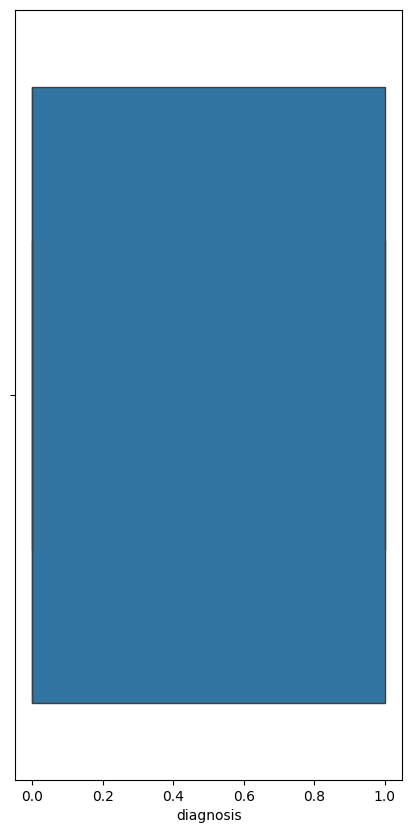

In [36]:
plt.figure(figsize=(5,10))
sns.boxplot(x='diagnosis',data=df)
plt.show()

In [37]:
Q1=df['diagnosis'].quantile(0.25)
Q3=df['diagnosis'].quantile(0.75)
IQR=Q3-Q1
print(IQR)
#iqr value is below 30,so need not remove

1.0


Choosing X and Y

In [39]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

MinMaxScaler for normalization

In [40]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x=ms.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

KNeighborsClassifier without Parameter

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        71
         1.0       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_test,y_test)
y_pred=knn.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Performing KFoldCrossValidation To Find n_neighbors

In [79]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=5,random_state=42,shuffle=True)
scores=cross_val_score(knn,x,y,cv=kf)
print(scores)
print(scores.mean())

[0.96491228 0.97368421 0.97368421 0.97368421 0.9380531 ]
0.964803601925167


In [44]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        71
         1.0       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        77
         1.0       0.97      0.95      0.96        37

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        71
         1.0       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

              preci

In [45]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index,test_index in kf.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    knn.fit(x_test,y_test)
    y_pred=knn.predict(x_test)
    print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98        71
         1.0       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        77
         1.0       1.00      0.95      0.97        37

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        71
         1.0       1.00      0.88      0.94        43

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

              preci

Assingning n_neighbor value in KNeighborsClassifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
model=KNeighborsClassifier(n_neighbors=2)
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        67
         1.0       1.00      0.89      0.94        46

    accuracy                           0.96       113
   macro avg       0.97      0.95      0.95       113
weighted avg       0.96      0.96      0.96       113



In [48]:
from sklearn.metrics import classification_report
model=KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        67
         1.0       1.00      0.87      0.93        46

    accuracy                           0.95       113
   macro avg       0.96      0.93      0.94       113
weighted avg       0.95      0.95      0.95       113

